### intro

<img src = "https://www.researchgate.net/profile/Hassen_Bouzgou/publication/316351306/figure/fig5/AS:485878301761541@1492853822090/Architecture-of-a-multilayer-perceptron-neural-network.png" height = 250 width = 500>

<img src = "https://image.slidesharecdn.com/mlp2-151222090756/95/multi-layer-perceptron-back-propagation-5-638.jpg?cb=1450775345" height = 400 width = 500>

steps: 
- initialise weights
- calculate outputs
- calculate error 
- calculate new weights
- update weights
- reach number of epochs? 
    - yes -> done
    - no -> calculate outputs

concepts:
- cost function (loss function)
- gradient descent
- derivative
- delta
- backpropagation


### concepts

#### gradient descent and derivative
- goal is to reach global minimum, reaching base with low error
- $min C (w_1, w_2, ... , w_n)$
<img src = "https://tse1.mm.bing.net/th/id/OIP.Tm2yUr_JD_0vYkIGkbYBdwAAAA?pid=ImgDet&rs=1" width = 400 height = 400>

- need to indicate direction, thus calculate partial derivative to move to the gradient direction

- sigmoid function: $y = \frac{1}{1+e^{-x}}$
    - partial derivative: $d = y * (1-y)$

- convex has one minimum, whereas non convex has multiple

- batch gradient descent: calculate error for all instances then update the weights
    - mini batch gradient descent: select predefined number of instances in order to calculate the error and update the weights

- stochastic gradient descent: calculate error for each instances then update the weights
    - prevents local minimums (non convex)
    - faster 




#### errors
- error = correct - predcition
- using table, ie x1 AND/OR/etc x2 -> class. 
    - class = correct
- expected output= 1 0 0
- prediction = 0.95 0.02 0.01
- error = (1-0.95)+ (0-0.2) + (0-0.01)

#### output layer delta
- activation function -> derivative -> delta -> gradient
- $delta_{output} = error * sigmoid_{derivative}$

#### hidden layer delta
- $delta_{hidden} = sigmoid_{derivative} * weight * delta_{output}$

#### backpropagation
- $weight_{n+1} = weight_{n} + (input*delta*learning \; rate)$
- weight update with backpropgation

#### learning rate
- defines how fast algorithm will learn
- high lr -> fast convergence -> may lose global minimum
- low lr -> slower convergence -> more likely to reach global minimum



#### bias, error and multiple outputs
- bias units aree added in all layers of neural net
- $output = sum(inputs * weights) + bias$
- simplest algorithm: $error = correct - prediction$

- mean square error
    - $MSE = \frac{1}{N} \sum_{i=1}^{N} (f_i - y_i)^2$

- root mean square error
    - $MSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (f_i - y_i)^2}$


#### hidden layers
- $neurons = \frac{inputs + outputs}{2}$
- linearly separable problems do not require hidden layers
- in general, two layers work well

### implementation

In [3]:
import numpy as np

##### sigmoid function

In [4]:
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

In [5]:
sigmoid(2.1)

0.8909031788043871

##### input layer to hidden layer

In [58]:
# inputs, outputs, weights
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])
weights0 = np.array([[-0.424, -0.740, -0.961],
                     [0.358, -0.577, -0.469]])

weights1 = np.array([[-0.017],
                     [-0.893],
                     [0.148]])
epochs = 100
learning_rate = 0.3

In [59]:
input_layer = inputs
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [60]:
sum_synapse0 = np.dot(input_layer, weights0)
sum_synapse0

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

In [61]:
hidden_layer = sigmoid(sum_synapse0)
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [62]:
weights1

array([[-0.017],
       [-0.893],
       [ 0.148]])

In [63]:
sum_synapse1 = np.dot(hidden_layer, weights1)
sum_synapse1

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

##### outler layer implementation

In [64]:
output_layer = sigmoid(sum_synapse1)
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [65]:
outputs

array([[0],
       [1],
       [1],
       [0]])

In [66]:
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

##### errors

In [67]:
error_output_layer = outputs - output_layer
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [68]:
average = np.mean(abs(error_output_layer))
average

0.49880848923713045

##### gradient descent

In [69]:
def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

In [70]:
s = sigmoid(0.5)
s

0.6224593312018546

##### partial derivative

In [71]:
d = sigmoid_derivative(s)
d

0.2350037122015945

##### outer layer delta

In [72]:
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [73]:
derivative_output = sigmoid_derivative(output_layer)
derivative_output

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

In [74]:
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [75]:
# delta = error * sigmoid derivative
delta_output = error_output_layer * derivative_output
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

##### hidden layer delta

In [76]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [77]:
weights1

array([[-0.017],
       [-0.893],
       [ 0.148]])

In [78]:
# error with shape between dimensions
# delta_output_x_weight = delta_output.dot(weights1)
# need to change shape

In [79]:
#transposed
weights1T = weights1.T
weights1T

array([[-0.017, -0.893,  0.148]])

In [80]:
weights1.shape, weights1T.shape

((3, 1), (1, 3))

In [81]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [82]:
delta_output_x_weight = delta_output.dot(weights1T)
delta_output_x_weight

array([[ 0.0016639 ,  0.08740354, -0.01448569],
       [-0.0023697 , -0.12447882,  0.02063031],
       [-0.0023554 , -0.12372783,  0.02050584],
       [ 0.00193282,  0.10153015, -0.01682694]])

In [83]:
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [84]:
delta_hidden_layer = delta_output_x_weight * sigmoid_derivative(hidden_layer)
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

##### weight update w backpropagation

In [85]:
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [86]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [87]:
#transpose hidden layer so we can perform hidden * delta
hidden_layerT = hidden_layer.T
hidden_layerT

array([[0.5       , 0.5885562 , 0.39555998, 0.48350599],
       [0.5       , 0.35962319, 0.32300414, 0.21131785],
       [0.5       , 0.38485296, 0.27667802, 0.19309868]])

In [88]:
# input * delta
input_x_delta1 = hidden_layerT.dot(delta_output)
input_x_delta1

array([[0.03293657],
       [0.02191844],
       [0.02108814]])

In [89]:
# new weights
weights1 = weights1 + (input_x_delta1 * learning_rate)
weights1

array([[-0.00711903],
       [-0.88642447],
       [ 0.15432644]])

In [90]:
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [91]:
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [92]:
# transpose input 
input_layerT = input_layer.T
input_layerT

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [93]:
input_x_delta0 = input_layerT.dot(delta_hidden_layer)
input_x_delta0

array([[-8.04778516e-05, -1.01345901e-02,  1.48194623e-03],
       [-9.11603819e-05, -1.17454886e-02,  2.26221011e-03]])

In [94]:
# weights updated! 
weights0 = weights0 + (input_x_delta0 * learning_rate)
weights0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

### complete neural net

In [95]:
import numpy as np

In [96]:
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

In [97]:
def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

In [98]:
inputs = np.array([[0,0], 
                   [0,1], 
                   [1,0], 
                   [1,1]])

In [99]:
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

weights0 = 2 * np.random.random((2, 3)) - 1
weights1 = 2 * np.random.random((3, 1)) - 1

epochs = 100000
learning_rate = 0.6
error = []

In [100]:

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
  if epoch % 10000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1T = weights1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights0 = weights0 + (input_x_delta0 * learning_rate)

1 - 0.020416844706173585

Epoch: 1 Error: 0.500015822423561
Epoch: 10001 Error: 0.025876324790037597
Epoch: 20001 Error: 0.01769223779981081
Epoch: 30001 Error: 0.014247613684094657
Epoch: 40001 Error: 0.01224023938429744
Epoch: 50001 Error: 0.010888844478230263


Epoch: 60001 Error: 0.009900557006424863
Epoch: 70001 Error: 0.009137764899588832
Epoch: 80001 Error: 0.008526215267299806
Epoch: 90001 Error: 0.008021875684301117


0.9795831552938264

0

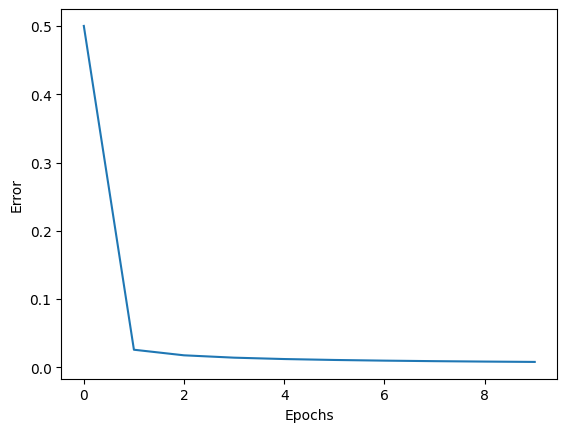

In [101]:

import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)

outputs

output_layer

weights0

weights1

def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]

round(calculate_output(np.array([0, 0])))

round(calculate_output(np.array([0, 1])))

round(calculate_output(np.array([1, 0])))

round(calculate_output(np.array([1, 1])))

### iris dataset

##### load dataset

In [102]:
from sklearn import datasets

In [105]:
iris = datasets.load_iris()
#iris.data

In [106]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [107]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [108]:
inputs = iris.data[0:100]

In [109]:
inputs.shape

(100, 4)

In [110]:
outputs = iris.target[0:100]

In [111]:
outputs.shape

(100,)

In [112]:
#reshape o/t to be multiplicative w inputs
outputs = outputs.reshape(-1, 1)
outputs.shape

(100, 1)

##### complete neural net

In [113]:
import numpy as np

def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

weights0 = 2 * np.random.random((4, 5)) - 1
weights1 = 2 * np.random.random((5,1)) - 1

In [114]:
weights0

array([[ 0.15255997, -0.9842421 , -0.32442533,  0.99469425,  0.86876438],
       [ 0.63833535, -0.86221351, -0.74087691,  0.45429938, -0.29076714],
       [ 0.11808865,  0.92038915, -0.44281482, -0.41094228, -0.78409234],
       [ 0.36366178,  0.91742015,  0.09382252, -0.44962804,  0.74297638]])

In [115]:
epochs = 3000
learning_rate = 0.01

error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
  
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1T = weights1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.4938221257323561
Epoch: 1001 Error: 0.03519897225995987
Epoch: 2001 Error: 0.023829115641119277


##### plot

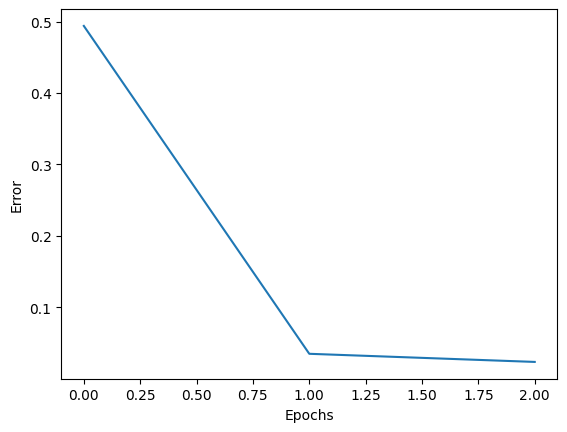

In [116]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)